In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import MaxPooling2D

classifier = Sequential()

#Adding Conv layers to NN
classifier.add(Conv2D(48,(3,3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (3, 3)))

classifier.add(Conv2D(48,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (3, 3)))

classifier.add(Flatten())

#Adding full connected layers
classifier.add(Dense(units = 92, activation = 'relu'))
classifier.add(Dense(units = 32, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics = ['accuracy'])

Using TensorFlow backend.


In [2]:
classifier.load_weights('classifier.h5')
print('loaded model weights')

loaded model weights


In [3]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 48)        1344      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 48)        20784     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 48)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1728)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 92)                159068    
_________________________________________________________________
dense_2 (Dense)              (None, 32)               

In [5]:
for layer in classifier.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue

In [6]:
# get filter weights
filters, biases = layer.get_weights()
print(layer.name, filters.shape)

dense_3 (32, 1)


In [8]:
# summarize filters in each convolutional layer
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# summarize filter shapes
for layer in classifier.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

conv2d_1 (3, 3, 3, 48)
conv2d_2 (3, 3, 48, 48)


In [14]:
import matplotlib.pyplot as plt
import numpy as np

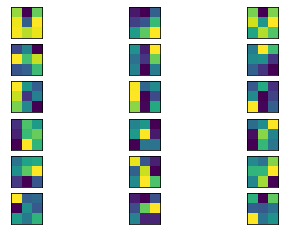

In [18]:
layer_dict = dict([(layer.name, layer) for layer in classifier.layers])
layer_name = 'conv2d_1'
filter_index = 10 # Which filter in this block would you like to visualise?
# Grab the filters and biases for that layer
filters, biases = layer_dict[layer_name].get_weights()
# Normalize filter values to a range of 0 to 1 so we can visualize them

f_min, f_max = np.amin(filters), np.amax(filters)
filters = (filters - f_min) / (f_max - f_min)
# Plot first few filters
n_filters, index = 6, 1

for i in range(n_filters):
    f = filters[:, :, :, i]
    # Plot each channel separately
    for j in range(3):
        ax = plt.subplot(n_filters, 3, index)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(f[:, :, j], cmap='viridis')
        index += 1
plt.show()

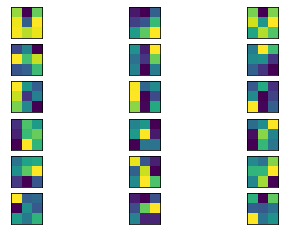

In [19]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])



layer_name = 'block1_conv2'
model = Model(inputs=model.inputs, outputs=layer_dict[layer_name].output)
# Perpare the image

image = load_img('tiger.jpg', target_size=(224, 224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)
# Apply the model to the image
feature_maps = model.predict(image)
square = 8
index = 1

for _ in range(square):
    for _ in range(square):
    ax = plt.subplot(square, square, index)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(feature_maps[0, :, :, index-1], cmap='viridis')
    index += 1
plt.show()

In [22]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('starushka.jpeg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

In [23]:
def layer_to_visualize(layer):
    inputs = [K.learning_phase()] + model.inputs

    _convout1_f = K.function(inputs, [layer.output])
    def convout1_f(X):
        # The [0] is to disable the training phase flag
        return _convout1_f([0] + [X])

    convolutions = convout1_f(img_to_visualize)
    convolutions = np.squeeze(convolutions)

    print ('Shape of conv:', convolutions.shape)
    n = convolutions.shape[0]
    n = int(np.ceil(np.sqrt(n)))
    
    # Visualization of each filter of the layer
    fig = plt.figure(figsize=(12,8))
    for i in range(len(convolutions)):
        ax = fig.add_subplot(n,n,i+1)
        ax.imshow(convolutions[i], cmap='gray')

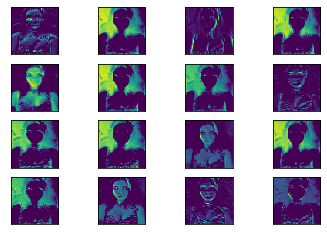

In [37]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np


layer_dict = dict([(layer.name, layer) for layer in classifier.layers])
layer_name = 'conv2d_1'

model = Model(inputs=classifier.inputs, outputs=layer_dict[layer_name].output)

#Perpare the image
image = load_img('single_prediction/bayzakova.jpg', target_size=(64,64))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

#Apply the model to the image
feature_maps = model.predict(image)

square = 4
index = 1
for _ in range(square):
    for _ in range(square):    
        ax = plt.subplot(square, square, index)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(feature_maps[0, :, :, index-1], cmap='viridis')
        index += 1
plt.show()

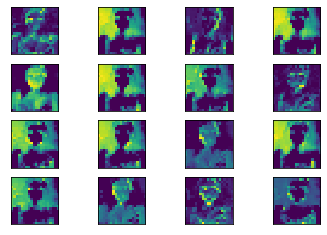

In [45]:
layer_dict = dict([(layer.name, layer) for layer in classifier.layers])
layer_name = 'max_pooling2d_1'

model = Model(inputs=classifier.inputs, outputs=layer_dict[layer_name].output)

feature_maps = model.predict(image)

square = 4
index = 1
for _ in range(square):
    for _ in range(square):    
        ax = plt.subplot(square, square, index)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(feature_maps[0, :, :, index-1], cmap='viridis')
        index += 1
plt.show()

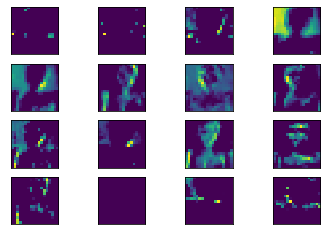

In [46]:
layer_dict = dict([(layer.name, layer) for layer in classifier.layers])
layer_name = 'conv2d_2'

model = Model(inputs=classifier.inputs, outputs=layer_dict[layer_name].output)

feature_maps = model.predict(image)

square = 4
index = 1
for _ in range(square):
    for _ in range(square):    
        ax = plt.subplot(square, square, index)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(feature_maps[0, :, :, index-1], cmap='viridis')
        index += 1
plt.show()

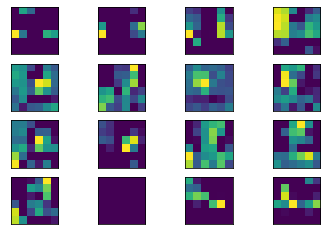

In [47]:
layer_dict = dict([(layer.name, layer) for layer in classifier.layers])
layer_name = 'max_pooling2d_2'

model = Model(inputs=classifier.inputs, outputs=layer_dict[layer_name].output)

feature_maps = model.predict(image)

square = 4
index = 1
for _ in range(square):
    for _ in range(square):    
        ax = plt.subplot(square, square, index)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(feature_maps[0, :, :, index-1], cmap='viridis')
        index += 1
plt.show()

Text(0, 0.5, 'test accuracy')

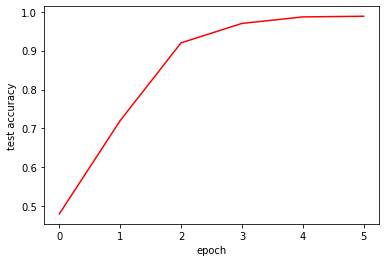

In [49]:
fig, ax = plt.subplots()
train_accuracy = [0.48, 0.72, 0.92, 0.97, 0.9868, 0.9885]
epochs = [0, 1, 2, 3, 4, 5]
ax.plot(epochs, train_accuracy, 'r')  
ax.set_xlabel('epoch')  
ax.set_ylabel('test accuracy') 

Text(0, 0.5, 'test accuracy')

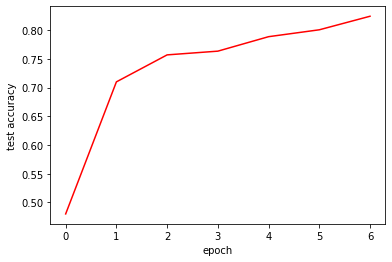

In [50]:
fig, ax = plt.subplots()  
val_accuracy = [0.48, 0.71, 0.7570, 0.7635, 0.7887, 0.8007, 0.8243]
epochs = [0, 1, 2, 3, 4, 5, 6]
ax.plot(epochs, val_accuracy, 'r')  
ax.set_xlabel('epoch')  
ax.set_ylabel('test accuracy')